In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy import array

In [126]:
df = pd.read_csv('landslide.csv')


In [127]:
df.head(5)

,dates,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.1175,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-07-2018,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,...,0.0,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
3,09-07-2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.0,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
4,10-07-2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.0,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511


In [128]:
#removing NaN Values

df = df.drop(df.index[[0,1]])


In [129]:
df.head()

,dates,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
2,08-07-2018,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
3,09-07-2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
4,10-07-2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
5,11-07-2018,t10,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
6,12-07-2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385


In [130]:
df.set_index('dates', inplace = True)
df.index = pd.to_datetime(df.index)

In [131]:
df.head()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-08-07,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,0.84,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
2018-09-07,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
2018-10-07,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
2018-11-07,t10,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,0.91,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
2018-12-07,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,0.91,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385


In [132]:
#Fill the missing values

df = df.fillna(method = 'bfill')

In [133]:
df.tail(5)

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-11-21,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,16.65926,58.69630,1026.797407,73577.25,2658.3185,5521.1231,47460.0,0.018148,54.4222
2018-11-22,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,15.52482,63.16312,1027.495248,65301.75,2545.1986,5521.1231,47460.0,0.017730,54.5674
2018-11-23,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,15.81560,59.21277,1029.318511,73534.50,2545.1986,5521.1231,47460.0,0.016312,54.8794
2018-11-24,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,16.58571,54.63571,1026.776357,72283.50,2563.3786,5521.1231,47460.0,0.015786,55.0286
2018-11-25,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,17.90000,49.41000,1026.771200,71799.75,3585.9300,5783.7581,47460.0,0.014700,55.3400


In [134]:
# convert charactor variable into interger
df = df.replace(['t10', 't11', 't12', 't13','t14', 't15','t6','t7','t8','t9'], [1, 2, 3, 4,5,6,7,8,9,10])



In [135]:
df

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-08-07,1,0.24,0.47,3.36,4.0,4.0,4.0,0.060,0.1175,0.84,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
2018-09-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.060,0.1175,0.84,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
2018-10-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.060,0.1175,0.84,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
2018-11-07,1,0.02,0.17,0.91,1.0,1.0,1.0,0.020,0.1700,0.91,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
2018-12-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.020,0.1700,0.91,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385
2018-07-13,1,0.00,0.00,0.00,0.0,0.0,0.0,0.020,0.1700,0.91,...,0.004961,21.20779,95.94805,1006.924675,339.75,8636.3896,14148.9787,54612.0,0.362078,100.0000
2018-07-15,1,0.04,0.17,0.92,2.0,2.0,2.0,0.020,0.0850,0.46,...,-0.122618,23.48571,96.17143,1006.568571,38.25,38.5429,134.9000,4000.0,0.186000,93.2000
2018-07-18,1,0.00,0.00,0.00,0.0,0.0,0.0,0.020,0.0850,0.46,...,-0.122618,21.79487,98.58974,1009.415385,29.25,304.5641,659.8889,4000.0,0.248205,5.7692
2018-07-19,1,0.17,0.54,0.62,1.0,1.0,1.0,0.170,0.5400,0.62,...,-0.111277,25.09346,88.32710,991.654112,4.50,1398.2710,2168.3333,6295.0,0.147103,4.2897


In [136]:
# d = sqrt{(x1)^2 + (y1)^2 + (z1)^2}
df['total_disp'] = np.sqrt(df['dispx']*df['dispx'] + df['dispy']*df['dispy'] + df['dispz']*df['dispz'])

In [137]:
df.head()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture,total_disp
dates,,,,,,,,,,,,,,,,,,,,,
2018-08-07,1,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,0.84,...,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000,0.000000
2018-09-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930,0.000000
2018-10-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511,0.000000
2018-11-07,1,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,0.91,...,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373,0.006819
2018-12-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,0.91,...,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385,0.006819


In [138]:
del df['dispx']
del df['dispy']
del df['dispz']

In [139]:
df.head()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture,total_disp
dates,,,,,,,,,,,,,,,,,,,,,
2018-08-07,1,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,0.84,...,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000,0.000000
2018-09-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930,0.000000
2018-10-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511,0.000000
2018-11-07,1,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,0.91,...,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373,0.006819
2018-12-07,1,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,0.91,...,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385,0.006819


In [140]:
# Normalization of dataset
mx = df.max()
mn = df.min()
dataset = (df-mn)/(mx-mn)

In [141]:
dataset.corr()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture,total_disp
stationid,1.000000,0.027804,0.021011,0.019076,0.056984,0.054715,0.061445,-0.018134,-0.063140,-0.080104,...,-0.056319,-0.039479,0.077474,0.469651,0.127633,0.173624,-0.096850,-0.140197,0.633221,0.445275
sumax,0.027804,1.000000,0.989326,0.958065,0.590519,0.591794,0.588352,0.169272,0.205971,0.303310,...,-0.019733,-0.046339,-0.183295,-0.017989,-0.025156,-0.027615,-0.045110,0.010302,-0.030884,-0.003710
sumay,0.021011,0.989326,1.000000,0.984946,0.574472,0.575953,0.575769,0.122588,0.165866,0.319146,...,-0.026486,-0.042112,-0.193804,-0.017693,-0.025056,-0.025947,-0.036758,0.010299,-0.039755,-0.011647
sumaz,0.019076,0.958065,0.984946,1.000000,0.561018,0.562391,0.564893,0.056268,0.101446,0.334074,...,-0.027598,-0.036685,-0.199721,-0.010539,-0.017468,-0.017967,-0.026881,0.014042,-0.034492,-0.008979
countwx,0.056984,0.590519,0.574472,0.561018,1.000000,0.999446,0.991249,0.019228,0.038502,0.123832,...,-0.022353,-0.087627,-0.051460,-0.071340,-0.043024,-0.034443,-0.062489,-0.001662,-0.029437,-0.000399
countwy,0.054715,0.591794,0.575953,0.562391,0.999446,1.000000,0.990651,0.019418,0.039011,0.124860,...,-0.023363,-0.088069,-0.051471,-0.070713,-0.043284,-0.034491,-0.062269,-0.001411,-0.031302,-0.000772
countwz,0.061445,0.588352,0.575769,0.564893,0.991249,0.990651,1.000000,0.036693,0.055964,0.126832,...,-0.030193,-0.086688,-0.054157,-0.070465,-0.042384,-0.033554,-0.061931,-0.014904,-0.029056,0.003939
accx,-0.018134,0.169272,0.122588,0.056268,0.019228,0.019418,0.036693,1.000000,0.984852,0.136071,...,-0.086566,-0.144676,0.054059,-0.016624,-0.026729,-0.027947,-0.085935,-0.001368,-0.039225,0.145947
accy,-0.063140,0.205971,0.165866,0.101446,0.038502,0.039011,0.055964,0.984852,1.000000,0.259450,...,-0.068718,-0.136287,0.018471,-0.055913,-0.067823,-0.072545,-0.104697,-0.009404,-0.073682,0.115756
accz,-0.080104,0.303310,0.319146,0.334074,0.123832,0.124860,0.126832,0.136071,0.259450,1.000000,...,0.115307,-0.074381,-0.106357,0.019954,0.009054,0.008533,0.010925,0.096875,0.014607,0.059100


In [142]:
# Convert into Matrix
dataset = dataset.as_matrix(columns=None)

In [143]:
dataset.shape

(963, 23)

In [144]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
# find the end of this pattern
        end_ix = i + n_steps
# check if we are beyond the dataset
        if end_ix > len(sequences):
            break
# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [145]:
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

(961, 3, 22) (961,)


In [106]:
x_train = X[:700]
y_train = y[:700]
x_test = X[700:]
y_test = y[700:]

In [107]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 3, 22)
(700,)
(261, 3, 22)
(261,)


In [102]:
import os

import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
from pandas import concat
from pandas import DataFrame
from keras.layers import Input
from numpy import array
from keras.models import Model
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.models import Sequential
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers import LSTM
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from scipy import stats
import csv as csv
import copy



# LSTM

In [92]:
n_features = x_train.shape[2]
model = Sequential()

model.add(LSTM(32, activation = 'tanh',return_sequences = False, input_shape = (n_steps,n_features)))

#model.add(LSTM(16, activation = 'tanh',return_sequences = False))
#model.add(Dropout(0.3))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
#model.add(Dropout(0.3))

model.add(Dense(1,activation = 'tanh'))
model.compile(loss = 'mse', optimizer = 'adam')





In [93]:
history = model.fit(x_train, y_train, epochs = 128, batch_size = 5, verbose = 1, shuffle = False)


In [94]:
y_pred = model.predict(x_test)

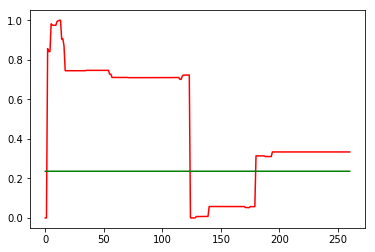

In [95]:
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

(261, 1)

# CNN

In [111]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 3, 22)
(700,)
(261, 3, 22)
(261,)


In [113]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import ConvLSTM2D
 
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from numpy import array
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling1D

In [114]:
n_features = x_train.shape[2]
model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, activation='tanh',padding = 'same', input_shape=(n_steps,n_features)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2,padding = 'same'))
model.add(Flatten())
model.add(Dense(16, activation = 'tanh'))

model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer='adam', loss= 'mse')



history = model.fit(x_train, y_train, epochs = 64, batch_size = 10, verbose = 0, shuffle = False)


In [115]:
y_pred = model.predict(x_test)

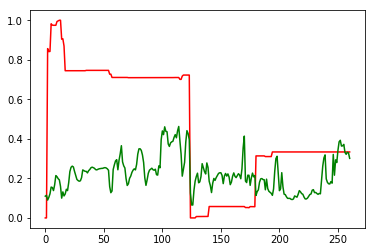

In [116]:
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

# CNN-LSTM

In [118]:
n_features = 1
n_length = 22


x_train = x_train.reshape((x_train.shape[0],n_steps,n_length,n_features))
x_test = x_test.reshape((x_test.shape[0],n_steps,n_length,n_features))

In [119]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=5, padding ='same',activation='tanh'),input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(64,activation = 'tanh'))
#model.add(Dropout(0.3))

model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer = 'adam', loss = 'mse')




history = model.fit(x_train, y_train, epochs = 64, batch_size = 15, verbose = 0, shuffle = False)


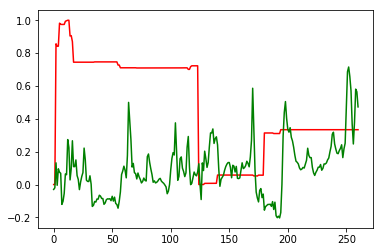

In [120]:
y_pred = model.predict(x_test)
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

# ConvLSTM

In [146]:
n_features = 1
n_length = 22


x_train = x_train.reshape((x_train.shape[0],n_steps,1,n_length,n_features))
x_test = x_test.reshape((x_test.shape[0],n_steps,1,n_length,n_features))

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters=128, kernel_size=(1,5),input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam')



history = model.fit(x_train, y_train, epochs = 128, batch_size = 20, verbose = 0, shuffle = False)


In [ ]:
y_pred = model.predict(x_test)
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()